# Center Cut Label Image

In [1]:
!pip install scikit-image

     |████████████████████████████████| 26.5MB 184kB/s  eta 0:00:01
     |████████████████████████████████| 4.4MB 25.8MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 48.7MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 53.6MB/s eta 0:00:01


In [1]:
from itertools import groupby, chain
from PIL import Image
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from skimage import io, color
import sys
from skimage import img_as_ubyte
import skimage.io as io
import os
np.set_printoptions(threshold=sys.maxsize)

### Commong Utility Functions

In [15]:


#from utilities.model_errors import ValidationError


def find_centermost_mask(input_mask, min_pixels):
    """
    Take in a binary mask and return a mask of the same shape, with only the centermost contiguous portion.
    If a mask contains no contours (objects), then just return it (it's all zeros anyway).
    """

    # Get all the bits aligned in memory
    input_mask = np.ascontiguousarray(input_mask, dtype=np.uint8)
    contours, _ = cv2.findContours(input_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours or len(contours) == 1:
        return input_mask

    moments = [cv2.moments(contour) for contour in contours]
    # (x, y) tuples of centroid locations for contours (that have area > 0)
    centroids = [
        (m['m10'] / m['m00'], m['m01'] / m['m00'])
        if m['m00'] and m['m00'] >= min_pixels else (0, 0)
        for m in moments
    ]

    if not centroids:
        raise ValidationError(f'No identified footprint contours contain more than {min_pixels} pixels.')

    # dimensions come 1-indexed, but array indicies are 0-indexed
    center = [(dim - 1) / 2 for dim in input_mask.shape]

    # Cacluate (Manhattan) distance from center of image
    distances_from_center = [abs(x - center[0]) + abs(y - center[1]) for x, y in centroids]
    centermost_contour = contours[distances_from_center.index(min(distances_from_center))]

    output_mask = np.zeros(input_mask.shape)
    cv2.fillPoly(output_mask, centermost_contour.transpose((1, 0, 2)), 1)

    return output_mask

### Center cut the Prediction Image and Center Cut the Original Image

In [16]:
label_img_path = '/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/label-626-gt'
label_cc_save_path = '/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis'

In [17]:
lst_label_imgs = [img for img in os.listdir(label_img_path) if os.path.isfile(os.path.join(label_img_path, img))]
lst_label_imgs[:5], len(lst_label_imgs)

(['image_386_gt.tif',
  'image_595_gt.tif',
  'image_301_gt.tif',
  'image_487_gt.tif',
  'image_87_gt.tif'],
 626)

In [23]:
for idx, lbl_img_name in enumerate(lst_label_imgs, start=1):
    print('processing : {}, Image Name : {}'.format(idx, lbl_img_name))
    lbl_img_path_with_filename = os.path.join(label_img_path, lbl_img_name)
    lbl_gray = cv2.imread(lbl_img_path_with_filename)
    lbl_gray = cv2.cvtColor(lbl_gray, cv2.COLOR_BGR2GRAY)
    print(np.unique(lbl_gray))
    print(lbl_gray.shape)
    
    lbl_gray[lbl_gray > 30] = 1
    print(np.unique(lbl_gray))

#     unique_pixel_values = np.unique(lbl_gray)
#     if(len(unique_pixel_values) > 1):  # to handle no building scenario returns one pixel value that is '0'
#         _, thresh = cv2.threshold(lbl_gray, unique_pixel_values[0] + 1, 255, 0)
#         print(np.unique(thresh))
#         lbl_cc_img_mask=find_centermost_mask(thresh,2000)
#     else:
#         lbl_cc_img_mask = np.zeros(lbl_gray.shape)
#     print(np.unique(lbl_cc_img_mask))
#     print(lbl_cc_img_mask.shape)
    
    lbl_cc_img_mask=find_centermost_mask(lbl_gray,10000)
    lbl_cc_img_mask = lbl_cc_img_mask.astype(np.byte)
    io.imsave(os.path.join(label_cc_save_path, lbl_img_name.replace('_gt', '_gt_cc')), lbl_cc_img_mask)
#     plt.imshow(lbl_cc_img_mask)
#     plt.show()

processing : 1, Image Name : image_386_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 2, Image Name : image_595_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 3, Image Name : image_301_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 4, Image Name : image_487_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 5, Image Name : image_87_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 6, Image Name : image_285_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 7, Image Name : image_354_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 8, Image Name : image_496_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 9, Image Name : image_133_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 10, Image Name : image_219_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 11, Image Name : image_449_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 12, Image Name : image_279_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 13, Image Name : image_99_gt.tif
[ 0 29]
(512, 512)


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_386_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_301_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_487_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_87_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 14, Image Name : image_322_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 15, Image Name : image_143_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 16, Image Name : image_91_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 17, Image Name : image_450_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 18, Image Name : image_370_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 19, Image Name : image_492_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 20, Image Name : image_41_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 21, Image Name : image_591_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 22, Image Name : image_406_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 23, Image Name : image_244_gt.tif
[ 0 29]
(512, 512)


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_322_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_143_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_370_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_492_gt_cc.tif is a low contrast im

[ 0 29]
processing : 24, Image Name : image_84_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 25, Image Name : image_323_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 26, Image Name : image_134_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 27, Image Name : image_32_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 28, Image Name : image_30_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 29, Image Name : image_530_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 30, Image Name : image_104_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 31, Image Name : image_171_gt.tif
[0]
(512, 512)
[0]
processing : 32, Image Name : image_79_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_84_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_323_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_134_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_32_gt_cc.tif is a low contrast imag

[ 0 29]
(512, 512)
[ 0 29]
processing : 33, Image Name : image_149_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 34, Image Name : image_178_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 35, Image Name : image_147_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 36, Image Name : image_433_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 37, Image Name : image_214_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 38, Image Name : image_142_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 39, Image Name : image_24_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 40, Image Name : image_451_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 41, Image Name : image_488_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 42, Image Name : image_286_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_433_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_142_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_24_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_451_gt_cc.tif is a low contrast ima

[ 0 29]
(512, 512)
[ 0 29]
processing : 43, Image Name : image_23_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 44, Image Name : image_340_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 45, Image Name : image_466_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 46, Image Name : image_196_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 47, Image Name : image_4_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 48, Image Name : image_293_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 49, Image Name : image_360_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 50, Image Name : image_541_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 51, Image Name : image_207_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 52, Image Name : image_381_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 53, Image Name : image_208_gt.tif
[ 0 29]
(512, 512)


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_4_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_293_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_541_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_381_gt_cc.tif is a low contrast imag

[ 0 29]
processing : 54, Image Name : image_287_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 55, Image Name : image_470_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 56, Image Name : image_199_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 57, Image Name : image_92_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 58, Image Name : image_13_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 59, Image Name : image_177_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 60, Image Name : image_127_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 61, Image Name : image_623_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 62, Image Name : image_60_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 63, Image Name : image_621_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 64, Image Name : image_474_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_177_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_127_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_60_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_474_gt_cc.tif is a low contrast ima

processing : 65, Image Name : image_560_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 66, Image Name : image_67_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 67, Image Name : image_576_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 68, Image Name : image_613_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 69, Image Name : image_82_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 70, Image Name : image_599_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 71, Image Name : image_316_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 72, Image Name : image_110_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 73, Image Name : image_1_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 74, Image Name : image_130_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 75, Image Name : image_596_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 76, Image Name : image_515_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_316_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_110_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_596_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_515_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 77, Image Name : image_47_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 78, Image Name : image_118_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 79, Image Name : image_194_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 80, Image Name : image_583_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 81, Image Name : image_139_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 82, Image Name : image_587_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 83, Image Name : image_348_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 84, Image Name : image_462_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 85, Image Name : image_197_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 86, Image Name : image_332_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 87, Image Name : image_253_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_348_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_332_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_253_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_430_gt_cc.tif is a low contrast im

processing : 88, Image Name : image_582_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 89, Image Name : image_430_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 90, Image Name : image_173_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 91, Image Name : image_509_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 92, Image Name : image_121_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 93, Image Name : image_88_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 94, Image Name : image_303_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 95, Image Name : image_243_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 96, Image Name : image_102_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 97, Image Name : image_353_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 98, Image Name : image_362_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_243_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_28_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_478_gt_cc.tif is a low contrast image


processing : 99, Image Name : image_376_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 100, Image Name : image_28_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 101, Image Name : image_478_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 102, Image Name : image_414_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 103, Image Name : image_267_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 104, Image Name : image_304_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 105, Image Name : image_606_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 106, Image Name : image_101_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 107, Image Name : image_392_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 108, Image Name : image_213_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 109, Image Name : image_209_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_101_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_213_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_209_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_476_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 110, Image Name : image_476_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 111, Image Name : image_27_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 112, Image Name : image_398_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 113, Image Name : image_443_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 114, Image Name : image_469_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 115, Image Name : image_441_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 116, Image Name : image_400_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 117, Image Name : image_567_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 118, Image Name : image_391_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 119, Image Name : image_350_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 120, Image Name : image_236_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 121, Image Name : image_289_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 122, Image Name : image_86_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_236_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_289_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_86_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_479_gt_cc.tif is a low contrast ima

[ 0 29]
(512, 512)
[ 0 29]
processing : 131, Image Name : image_229_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 132, Image Name : image_268_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 133, Image Name : image_22_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 134, Image Name : image_272_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 135, Image Name : image_48_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 136, Image Name : image_489_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 137, Image Name : image_11_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 138, Image Name : image_321_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 139, Image Name : image_480_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 140, Image Name : image_259_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_229_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_48_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_11_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_480_gt_cc.tif is a low contrast imag

processing : 141, Image Name : image_76_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 142, Image Name : image_550_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 143, Image Name : image_239_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 144, Image Name : image_185_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 145, Image Name : image_184_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 146, Image Name : image_471_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 147, Image Name : image_174_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 148, Image Name : image_598_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 149, Image Name : image_258_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 150, Image Name : image_233_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 151, Image Name : image_526_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 152, Image Name : image_205_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 153, Image Name : image_223_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_550_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_185_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_184_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_174_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 154, Image Name : image_42_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 155, Image Name : image_581_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 156, Image Name : image_431_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 157, Image Name : image_257_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 158, Image Name : image_614_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 159, Image Name : image_608_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 160, Image Name : image_446_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 161, Image Name : image_404_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 162, Image Name : image_329_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 163, Image Name : image_467_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 164, Image Name : image_15_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 165, Image Name : image_545_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_431_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_257_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_608_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_446_gt_cc.tif is a low contrast im

processing : 166, Image Name : image_9_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 167, Image Name : image_248_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 168, Image Name : image_50_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 169, Image Name : image_181_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 170, Image Name : image_313_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 171, Image Name : image_167_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 172, Image Name : image_83_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 173, Image Name : image_312_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 174, Image Name : image_377_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 175, Image Name : image_277_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 176, Image Name : image_78_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 177, Image Name : image_423_gt.tif


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_181_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_313_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_167_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_312_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 178, Image Name : image_532_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 179, Image Name : image_609_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 180, Image Name : image_388_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 181, Image Name : image_150_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 182, Image Name : image_589_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 183, Image Name : image_263_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 184, Image Name : image_625_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 185, Image Name : image_570_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 186, Image Name : image_424_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 187, Image Name : image_51_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 188, Image Name : image_336_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_263_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_570_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_424_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_51_gt_cc.tif is a low contrast ima

processing : 189, Image Name : image_117_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 190, Image Name : image_68_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 191, Image Name : image_412_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 192, Image Name : image_21_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 193, Image Name : image_306_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 194, Image Name : image_434_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 195, Image Name : image_458_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 196, Image Name : image_111_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 197, Image Name : image_2_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 198, Image Name : image_459_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 199, Image Name : image_156_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 200, Image Name : image_486_gt.tif
[ 0 29]
(512, 512)


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_458_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_111_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_2_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_459_gt_cc.tif is a low contrast imag

[ 0 29]
processing : 201, Image Name : image_254_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 202, Image Name : image_112_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 203, Image Name : image_337_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 204, Image Name : image_395_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 205, Image Name : image_548_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 206, Image Name : image_620_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 207, Image Name : image_131_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 208, Image Name : image_58_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 209, Image Name : image_351_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_548_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_620_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_131_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_58_gt_cc.tif is a low contrast ima

processing : 210, Image Name : image_61_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 211, Image Name : image_371_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 212, Image Name : image_146_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 213, Image Name : image_564_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 214, Image Name : image_200_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 215, Image Name : image_34_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 216, Image Name : image_226_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 217, Image Name : image_52_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 218, Image Name : image_180_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 219, Image Name : image_490_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 220, Image Name : image_372_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 221, Image Name : image_358_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 222, Image Name : image_20_gt.tif
[ 0 29]
(512, 512)


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_52_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_490_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_358_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_314_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 223, Image Name : image_296_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 224, Image Name : image_330_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 225, Image Name : image_347_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 226, Image Name : image_216_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 227, Image Name : image_344_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 228, Image Name : image_314_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 229, Image Name : image_94_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 230, Image Name : image_460_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 231, Image Name : image_164_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 232, Image Name : image_401_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 233, Image Name : image_17_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 234, Image Name : image_66_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 235, Image Name : image_440_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 236, Im

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_29_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_472_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_463_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_528_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 242, Image Name : image_528_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 243, Image Name : image_168_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 244, Image Name : image_571_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 245, Image Name : image_186_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 246, Image Name : image_46_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 247, Image Name : image_122_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 248, Image Name : image_310_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 249, Image Name : image_179_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 250, Image Name : image_260_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 251, Image Name : image_192_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 252, Image Name : image_426_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 253, Image Name : image_520_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 254, Image Name : image_373_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 255, 

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_175_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_408_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_227_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_220_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 260, Image Name : image_115_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 261, Image Name : image_534_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 262, Image Name : image_505_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 263, Image Name : image_159_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 264, Image Name : image_335_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 265, Image Name : image_594_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 266, Image Name : image_278_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 267, Image Name : image_577_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 268, Image Name : image_365_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 269, Image Name : image_537_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 270, Image Name : image_389_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 271, Image Name : image_270_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 272, Image Name : image_16_gt.tif
[ 0 29]
(512, 512)
[ 0 29]

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_572_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_274_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_275_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_438_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 279, Image Name : image_275_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 280, Image Name : image_438_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 281, Image Name : image_255_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 282, Image Name : image_309_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 283, Image Name : image_359_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 284, Image Name : image_14_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 285, Image Name : image_230_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 286, Image Name : image_155_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 287, Image Name : image_218_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 288, Image Name : image_447_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 289, Image Name : image_499_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 290, Image Name : image_602_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 291, Image Name : image_96_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_604_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_555_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_453_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_38_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 297, Image Name : image_453_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 298, Image Name : image_38_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 299, Image Name : image_429_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 300, Image Name : image_262_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 301, Image Name : image_98_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 302, Image Name : image_558_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 303, Image Name : image_363_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 304, Image Name : image_105_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 305, Image Name : image_437_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 306, Image Name : image_419_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 307, Image Name : image_403_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 308, Image Name : image_522_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 309, Image Name : image_198_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 310, I

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_315_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_241_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_107_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_154_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 316, Image Name : image_37_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 317, Image Name : image_491_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 318, Image Name : image_307_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 319, Image Name : image_154_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 320, Image Name : image_57_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 321, Image Name : image_300_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 322, Image Name : image_56_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 323, Image Name : image_240_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 324, Image Name : image_568_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 325, Image Name : image_225_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 326, Image Name : image_477_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 327, Image Name : image_158_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 328, Image Name : image_367_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
p

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_393_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_584_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_256_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_436_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 335, Image Name : image_584_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 336, Image Name : image_256_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 337, Image Name : image_436_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 338, Image Name : image_501_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 339, Image Name : image_527_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 340, Image Name : image_483_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 341, Image Name : image_35_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 342, Image Name : image_114_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 343, Image Name : image_44_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 344, Image Name : image_536_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 345, Image Name : image_89_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 346, Image Name : image_319_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 347, Image Name : image_547_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
p

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_600_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_384_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_402_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_465_gt_cc.tif is a low contrast im

processing : 353, Image Name : image_402_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 354, Image Name : image_465_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 355, Image Name : image_320_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 356, Image Name : image_206_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 357, Image Name : image_188_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 358, Image Name : image_113_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 359, Image Name : image_610_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 360, Image Name : image_484_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 361, Image Name : image_245_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 362, Image Name : image_231_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 363, Image Name : image_183_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 364, Image Name : image_556_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 365, Image Name : image_427_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 366, Image N

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_546_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_590_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_265_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_529_gt_cc.tif is a low contrast im

[ 0 29]
processing : 372, Image Name : image_590_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 373, Image Name : image_265_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 374, Image Name : image_529_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 375, Image Name : image_327_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 376, Image Name : image_425_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 377, Image Name : image_495_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 378, Image Name : image_615_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 379, Image Name : image_80_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 380, Image Name : image_176_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 381, Image Name : image_294_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 382, Image Name : image_539_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 383, Image Name : image_157_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 384, Image Name : image_417_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 385, 

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_504_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_551_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_611_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_428_gt_cc.tif is a low contrast im

[ 0 29]
processing : 391, Image Name : image_551_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 392, Image Name : image_103_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 393, Image Name : image_475_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 394, Image Name : image_611_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 395, Image Name : image_428_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 396, Image Name : image_251_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 397, Image Name : image_573_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 398, Image Name : image_33_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 399, Image Name : image_554_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 400, Image Name : image_135_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 401, Image Name : image_202_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 402, Image Name : image_445_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 403, Image Name : image_622_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 404, 

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_249_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_562_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_140_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_366_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 430, Image Name : image_152_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 431, Image Name : image_75_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 432, Image Name : image_538_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 433, Image Name : image_553_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 434, Image Name : image_129_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 435, Image Name : image_563_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 436, Image Name : image_138_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 437, Image Name : image_299_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 438, Image Name : image_123_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 439, Image Name : image_161_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 440, Image Name : image_346_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 441, Image Name : image_518_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 442, Image Name : image_297_gt.tif
[ 0 29]
(512, 512)
[ 0 29]

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_538_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_553_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_129_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_161_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 449, Image Name : image_187_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 450, Image Name : image_485_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 451, Image Name : image_343_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 452, Image Name : image_543_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 453, Image Name : image_561_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 454, Image Name : image_411_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 455, Image Name : image_308_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 456, Image Name : image_151_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 457, Image Name : image_62_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 458, Image Name : image_342_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 459, Image Name : image_54_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 460, Image Name : image_535_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 461, Image Name : image_616_gt.tif
[ 0 29]
(512, 512)
[ 0 29]


/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_543_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_561_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_411_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_62_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 468, Image Name : image_566_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 469, Image Name : image_559_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 470, Image Name : image_422_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 471, Image Name : image_525_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 472, Image Name : image_261_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 473, Image Name : image_291_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 474, Image Name : image_605_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 475, Image Name : image_125_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 476, Image Name : image_119_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 477, Image Name : image_31_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 478, Image Name : image_387_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 479, Image Name : image_355_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 480, Image Name : image_341_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 481, 

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_525_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_261_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_605_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_125_gt_cc.tif is a low contrast im

processing : 486, Image Name : image_498_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 487, Image Name : image_90_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 488, Image Name : image_481_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 489, Image Name : image_409_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 490, Image Name : image_457_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 491, Image Name : image_473_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 492, Image Name : image_39_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 493, Image Name : image_382_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 494, Image Name : image_507_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 495, Image Name : image_612_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 496, Image Name : image_282_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 497, Image Name : image_586_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 498, Image Name : image_456_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 499, Image Nam

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_457_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_473_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_39_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_382_gt_cc.tif is a low contrast ima

[ 0 29]
(512, 512)
[ 0 29]
processing : 505, Image Name : image_162_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 506, Image Name : image_552_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 507, Image Name : image_356_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 508, Image Name : image_59_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 509, Image Name : image_345_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 510, Image Name : image_619_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 511, Image Name : image_533_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 512, Image Name : image_148_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 513, Image Name : image_421_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 514, Image Name : image_524_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 515, Image Name : image_549_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 516, Image Name : image_448_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 517, Image Name : image_523_gt.tif
[ 0 29]
(512, 512)
[ 0 29]

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_59_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_345_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_619_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_533_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 523, Image Name : image_494_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 524, Image Name : image_40_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 525, Image Name : image_25_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 526, Image Name : image_124_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 527, Image Name : image_574_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 528, Image Name : image_211_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 529, Image Name : image_557_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 530, Image Name : image_65_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 531, Image Name : image_45_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 532, Image Name : image_511_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 533, Image Name : image_361_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 534, Image Name : image_266_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 535, Image Name : image_331_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 536, Ima

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_574_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_211_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_557_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_65_gt_cc.tif is a low contrast ima

[ 0 29]
(512, 512)
[ 0 29]
processing : 542, Image Name : image_603_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 543, Image Name : image_77_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 544, Image Name : image_232_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 545, Image Name : image_339_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 546, Image Name : image_7_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 547, Image Name : image_288_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 548, Image Name : image_283_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 549, Image Name : image_195_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 550, Image Name : image_464_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 551, Image Name : image_502_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 552, Image Name : image_380_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 553, Image Name : image_454_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 554, Image Name : image_617_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
p

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_288_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_464_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_502_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_380_gt_cc.tif is a low contrast im

[ 0 29]
(512, 512)
[ 0 29]
processing : 561, Image Name : image_413_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 562, Image Name : image_95_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 563, Image Name : image_326_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 564, Image Name : image_575_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 565, Image Name : image_580_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 566, Image Name : image_71_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 567, Image Name : image_497_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 568, Image Name : image_70_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 569, Image Name : image_410_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 570, Image Name : image_172_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 571, Image Name : image_193_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 572, Image Name : image_514_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 573, Image Name : image_607_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
p

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_497_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_70_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_410_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_172_gt_cc.tif is a low contrast ima

[ 0 29]
processing : 579, Image Name : image_145_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 580, Image Name : image_74_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 581, Image Name : image_540_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 582, Image Name : image_544_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 583, Image Name : image_396_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 584, Image Name : image_163_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 585, Image Name : image_379_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 586, Image Name : image_394_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 587, Image Name : image_64_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 588, Image Name : image_405_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 589, Image Name : image_228_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 590, Image Name : image_237_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 591, Image Name : image_512_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 592, I

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_379_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_64_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_405_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_228_gt_cc.tif is a low contrast ima

[ 0 29]
(512, 512)
[ 0 29]
processing : 595, Image Name : image_108_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 596, Image Name : image_53_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 597, Image Name : image_126_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 598, Image Name : image_352_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 599, Image Name : image_317_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 600, Image Name : image_234_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 601, Image Name : image_269_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 602, Image Name : image_276_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 603, Image Name : image_247_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 604, Image Name : image_375_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 605, Image Name : image_217_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 606, Image Name : image_8_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 607, Image Name : image_407_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
p

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_234_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_269_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_276_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_247_gt_cc.tif is a low contrast im

[ 0 29]
processing : 612, Image Name : image_43_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 613, Image Name : image_19_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 614, Image Name : image_311_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 615, Image Name : image_132_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 616, Image Name : image_500_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 617, Image Name : image_521_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 618, Image Name : image_510_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 619, Image Name : image_93_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 620, Image Name : image_235_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 621, Image Name : image_513_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 622, Image Name : image_280_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 623, Image Name : image_482_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 624, Image Name : image_6_gt.tif
[ 0 29]
(512, 512)
[ 0 29]
processing : 625, Imag

/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_93_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_513_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_280_gt_cc.tif is a low contrast image
/home/ec2-user/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel/__main__.py:24: UserWarning: /home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_482_gt_cc.tif is a low contrast ima

processing : 1, Image Name : image_142_bfp.tif
[ 0 29]
(512, 512)
[ 0 29]


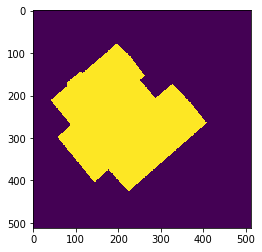

processing : 2, Image Name : image_42_bfp.tif
[ 0 29]
(512, 512)
[ 0 29]


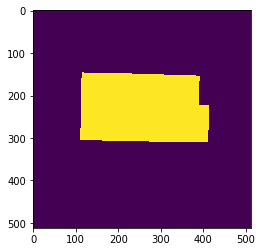

processing : 3, Image Name : image_110_bfp.tif
[ 0 29]
(512, 512)
[ 0 29]


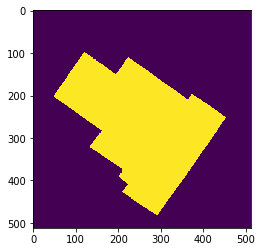

processing : 4, Image Name : image_87_bfp.tif
[ 0 29]
(512, 512)
[ 0 29]


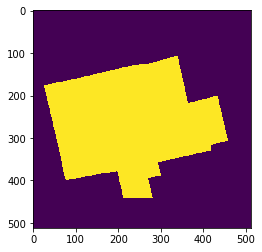

processing : 5, Image Name : image_22_bfp.tif
[ 0 29]
(512, 512)
[ 0 29]


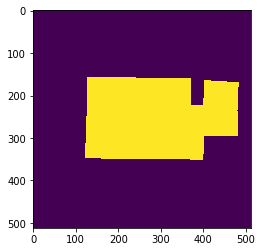

In [41]:
for idx, lbl_img_name in enumerate(lst_label_imgs[:5], start=1):
    print('processing : {}, Image Name : {}'.format(idx, lbl_img_name))
    lbl_img_path_with_filename = os.path.join(label_img_path, lbl_img_name)
    pred_gray = cv2.imread(lbl_img_path_with_filename)
    pred_gray = cv2.cvtColor(pred_gray, cv2.COLOR_BGR2GRAY)
    print(np.unique(pred_gray))
    print(pred_gray.shape)
    
    pred_gray[pred_gray > 30] = 1
    print(np.unique(pred_gray))
    pred_cc_img_mask=find_centermost_mask(pred_gray,2000)
    pred_cc_img_mask = pred_cc_img_mask.astype(np.byte)
#     io.imsave(os.path.join(label_cc_save_path, lbl_img_name.replace('_bfp', '_cc_binary')), pred_cc_img_mask)
    plt.imshow(pred_cc_img_mask)
    plt.show()